# Classifying Songs by Genre using its Features

Author: Adam Miller

Course Project, UC Irvine, Math 10, Spring 2024


## Introduction: 

This data is from over 30,000 songs from the Spotify API. The songs come from six main genres (EDM, Latin, Pop, R&B, Rap, and Rock), but there are also some subgenres categorized by Spotify included in the data. Both the data and the data dictionary below were taken from [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs?resource=download). As we can see from the data dictionary, the data includes many features of each song, including the popularity, genre, danceability, energy, speechiness, acousticness, tempo, and duration; I plan to explore any possible correlation between these features (e.g. are songs with higher tempo more danceable? Does track length affect popularity?). I also plan to use k-means clustering to see if we can classify songs by genre based on the other features, and also to see if we are able to find similar songs to an input song (as the other songs in the same cluster as the input should be similar).  


|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |


In [37]:
import pandas as pd
data = pd.read_csv('./spotify_songs.csv')

## Cleaning Up the Data: 

Since the way the data is organized is by Spotify's playlisting, or the autogenerated playlists created by Spotify, it's possible that some songs show up more than once in the dataframe, since one song could be placed in multiple playlists. The following code computes how many unique entries there are in the `'track_id'` column. 

In [38]:
data['track_id'].nunique()

28356

So, there are only 28,356 unique tracks in the data set. In order to get the best results when we perform regression and classification methods on the data set, we should update the dataframe so that each track appears once, and drop the duplicate values. Also, we'll drop any rows with missing values: 

In [39]:
data_unique = data.drop_duplicates(subset=['track_id'])
df = data_unique.dropna()
df.shape

(28352, 23)

# Data Exploration:

Now, we have a dataframe `df` which consists of 28,352 unique songs (and no missing values). For this section, we focus on visualizing the data in a sort of exploratory data analysis. We'll begin by printing the first five rows of the dataframe: 

In [40]:
df.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


 Next, we compute the mean, standard deviation, min, max, and 25th, 50th, and 75th quartiles of each of the features that have numerical values. 

In [41]:
df.select_dtypes(['float64', 'int64']).describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000,28352.000000
mean,39.335320,0.653375,0.698373,5.367417,-6.817777,0.565533,0.107939,0.177192,0.091129,0.190955,0.510386,120.958219,226574.631102
std,23.699443,0.145791,0.183508,3.613743,3.036433,0.495696,0.102547,0.222814,0.232562,0.155888,0.234344,26.954502,61081.363704
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.310250,0.000000,0.041000,0.014300,0.000000,0.092600,0.329000,99.972000,187741.250000
50%,42.000000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.993500,216933.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.708750,1.000000,0.133000,0.260000,0.006573,0.249000,0.695000,133.999000,254975.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


This is a lot of information to process just by looking at it, so we'll make a few graphs to make some of the relationships between the features a bit more visually appealing. First, let's plot the number of songs in each genre: 

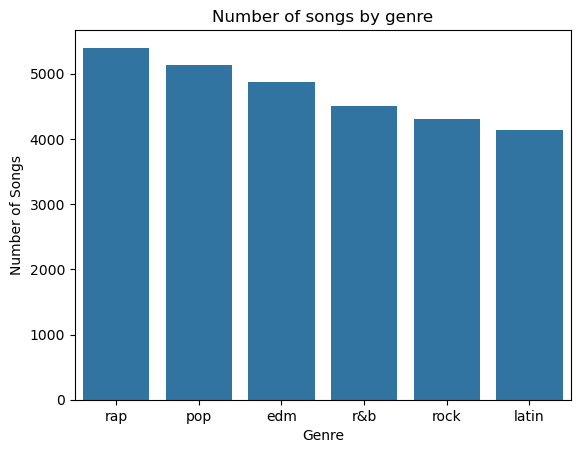

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.countplot(data = df, x='playlist_genre', order = df['playlist_genre'].value_counts().index)
plt.title('Number of songs by genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.show()

We can see that there are over 4000 songs in each genre, so it's a pretty uniform distribution, where there isn't too much or too little of one genre. This makes the `'playlist_genre'` feature of the data a good canditate to use for multiclass classfication, which we will focus on later. 

# Linear Regression:

Before really analyzing the data, I have a hunch that loudness and energy will be correlated, in that louder songs will have more energy. To see this relationship, let's plot energy as a function of loudness. Also, we'll apply linear regression and plot the linear regression line on the same graph: 


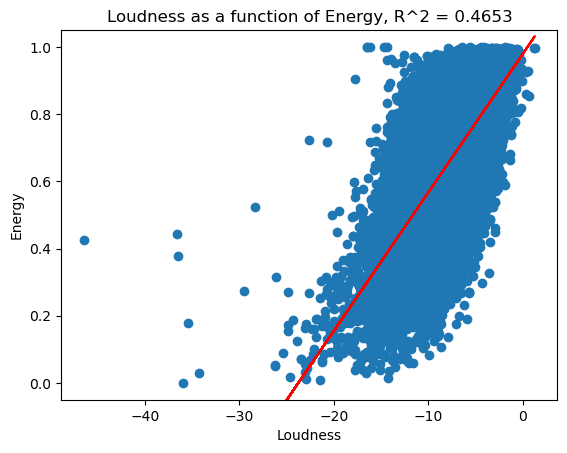

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['loudness']]
y = df['energy']
lm.fit(X, y)
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, X * lm.coef_[0] + lm.intercept_, color='red')
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel("Loudness")
ax.set_ylabel("Energy")
ax.set_title(f"Loudness as a function of Energy, R^2 = {lm.score(X, y):.4f}");

So, we can see that the R^2 value is 0.4653. 

The above graph shows only the relationship between `'loudness'` and `'energy'`. If we want to visualize the relationships between many more of the features, particularly the features which take on numerical values, we can use the Correlation Matrix, and plot it using a heatmap: 

<Axes: >

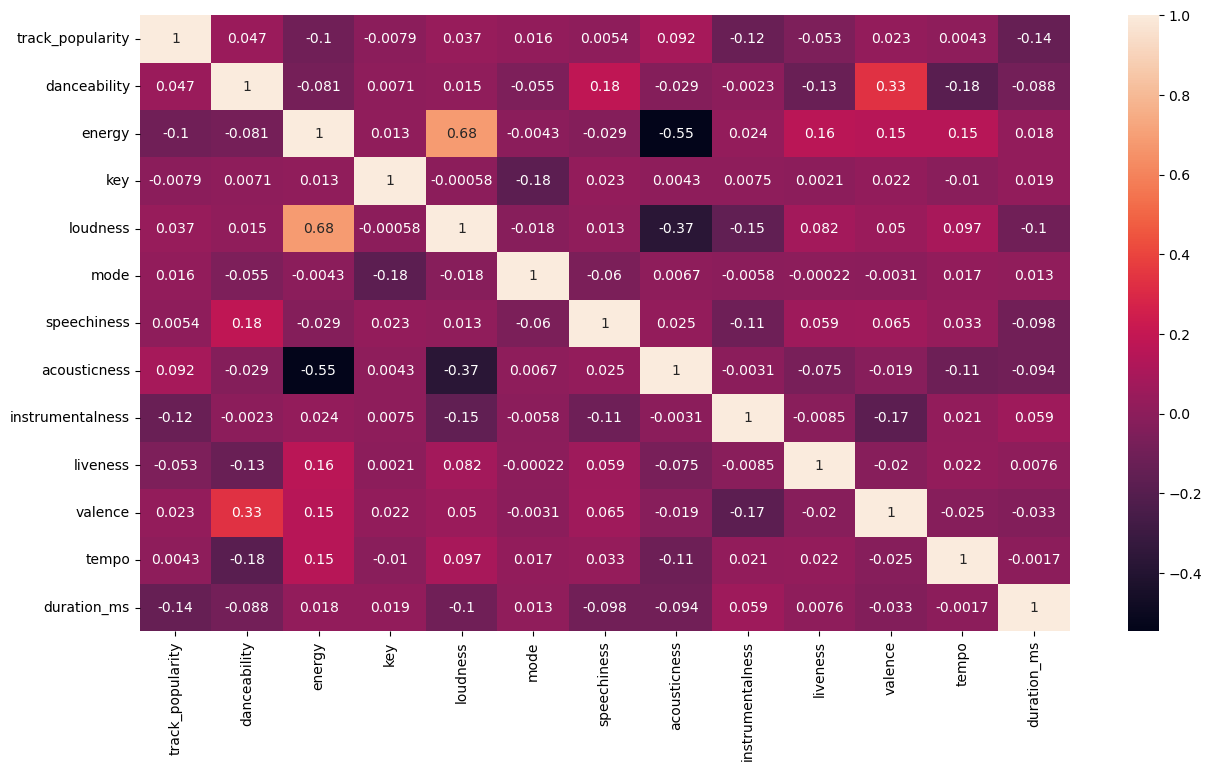

In [44]:
numerical_features = df.select_dtypes(['float64', 'int64'])
corr = numerical_features.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

From this, we can see that the vast majority of the features are not correlated at all. In fact, `'loudness'` and `'energy'`, which we plotted above, happen to be the highest correlated. Now, this may mean that we may get some low accuracy scores when doing classification, but that doesn't mean that these efforts are fruitless. However, this goes a bit against our intuition: one may guess that a song's energy and danceability may be very correlated, or that a song's energy and tempo may be correlated, etc. and this correlation matrix shows that this is actually not the case: There are a couple of explanations for this that I can come up with. One is that we are missing a few key features, including the types of instruments in the song or the lyrical content of the song. Another possibility is that multiple features together are better at predicting one feature than only considering one at a time. To test this, we can use multiple linear regression and compare the $R^2$ scores for different combinations of features predicting one feature. We'll test how combinations of the features `'danceability'`, `'loudness'`, `'tempo'`, `'valence'`, and `'liveness'` predict `'energy'`. We'll only use combinations of these five features just for simplicity, so we don't get too many combinations: 

In [45]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.5, random_state=0, stratify=df['playlist_genre'])

First we split the data into training and testing data, and the `stratify=df['playlist_genre']` code ensures that each group has the same proportion of genres. 

In [46]:
from itertools import combinations
features = ['danceability', 'loudness',	'tempo', 'valence', 'liveness']
from sklearn.metrics import r2_score
features_comb = list(combinations(features, 1)) + list(combinations(features, 2)) + list(combinations(features, 3)) + list(combinations(features, 4)) + list(combinations(features, 5))
R2_train = []
R2_test = []
for combination in features_comb:
    x_train = df_train[list(combination)]
    y_train = df_train['energy']
    x_test = df_test[list(combination)]
    y_test = df_test['energy']

    lm = LinearRegression()
    lm.fit(x_train, y_train)
    y_train_pred = lm.predict(x_train)
    y_test_pred = lm.predict(x_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    R2_train.append(r2_train)
    R2_test.append(r2_test)

results = pd.DataFrame({'Feature': [list(comb) for comb in features_comb],'R2_train': R2_train,'R2_test': R2_test})
results

,Feature,R2_train,R2_test
0,[danceability],0.006296,0.006805
1,[loudness],0.463760,0.466767
2,[tempo],0.027840,0.017513
3,[valence],0.023161,0.021459
4,[liveness],0.028556,0.024941
5,"[danceability, loudness]",0.472100,0.475298
6,"[danceability, tempo]",0.030229,0.020985
7,"[danceability, valence]",0.042003,0.041449
8,"[danceability, liveness]",0.031961,0.028985
9,"[loudness, tempo]",0.472914,0.472255


From this, we see that the combination of all five features has the best $R^2$ score, and is therefore using the combination of danceability, loudness, tempo, valence, and liveness is the best at predicting the energy of the song, with a training $R^2$ score of $0.513358$ and a testing $R^2$ score of $0.508561$. 

# Classification of Songs by Genre: 

In this section, I want to see if we are able to accurately classify the songs by Genre using methods of multiclass classification. In order to do this, I will use k-nearest neighbor classification, k-means clustering, and another method of classification called Random Forest Classification. From the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) website, the random forest classifier is a machine learning algorithm which fits decision tree classifiers on subsamples of the data set, and then uses averaging to imporve the predictive accuracy and control overfitting. 


Before we start using these classification methods, we have to:
1. Scale the features using a min-max scaler
2. Use the Label Encoder to encode the genres `pop`, `rap`, `edm`, `latin`, `r&b`, and `rock` into the classes `1, 2, 3, 4, 5, 6`
#### Scaling the Data: 

First, we need to choose which features we want to use to predict the genre of the song.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
label = 'playlist_genre'
scaled_features = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled_features, columns = df[features].columns)
X = df_scaled
y = df[label]

#### Label Encoding: 

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Now, we're ready to start using the classification methods to see if we can classify songs by genre using the features `'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'`. Note that since we are using a total of $12$ features to make the prediction, we are not going to be able to graph and visualize the decision boundary, since we are not able to plot a 12-dimensional graph. We are still going to be able to get accuracy scores. 

### kNN Classification: 
We will test different values of $k$ to see which one gives us the best accuracy using 5-fold cross validation. Since there are a total of $28352$ songs in the dataframe, we should test using a large number of neighbors, so we'll test using the 100, 500, 2000, and 5000 nearest neighbors. Unfortunately, this will take a long time to run since there are so many songs and so many features for each song. 

In [49]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = [10, 100, 500, 2000, 5000]
average_accuracy = []
for n in num_neighbors:
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(knn, X, y, cv=kf)
    accuracy = score.mean()
    average_accuracy.append(accuracy)
average_accuracy

[0.456793239654581,
 0.4690676939545452,
 0.44042765927207234,
 0.39394114118148676,
 0.32604477683887545]

From this, we can see that of the number of neighbors being 10, 100, 500, 2000, or 5000, using 100 neighbors gave the best prediction accuracy of $0.4691$. Just this test does not mean that 100 is the ideal number of neighbors, but of the five values we tested, 100 neighbors gave the best accuracy.  

### k-means Clustering: 

Here, we want to choose the best $k$ value, or the number of clusters which will be best at predicting the genres. To do this, we will plot the loss as a function of $k$ and then find the "elbow" in the graph. 

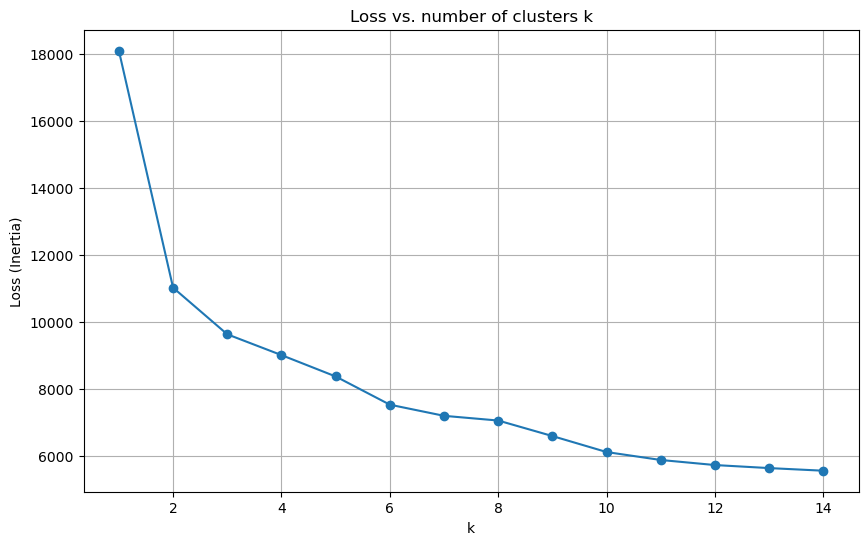

In [50]:
from sklearn.cluster import KMeans

k_values = range(1, 15)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_values, inertias, marker='o')
ax.set_title("Loss vs. number of clusters k")
ax.set_xlabel("k")
ax.set_ylabel("Loss (Inertia)")
ax.grid(True)
plt.show()


From this, we can see that the most decrease is at 2 clusters, but there is still a pretty steady decrease after 2 clusters. If I had to classify a true "elbow" for this graph, I would say that $k=2$ is probably a good number to choose. 

In [51]:
accuracy_scores = []
for n in range(1, 15):
    kmeans = KMeans(n_clusters = n, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    correct_labels = sum(y==labels)
    accuracy_scores.append(correct_labels / y.size)
accuracy_scores

[0.1720160835214447,
 0.15282872460496613,
 0.15953019187358916,
 0.15244074492099322,
 0.15695541760722348,
 0.14637415349887134,
 0.13441732505643342,
 0.12521162528216703,
 0.1177341986455982,
 0.09600733634311512,
 0.07763120767494357,
 0.06867240406320542,
 0.061336060948081264,
 0.060983352144469524]

From this, we see that $k=1$ gives the best accuracy score, but for $k>1$, the best number of clusters is $k=3$. Also, the accuracy of the k-means clustering is much lower (~0.16) than the accuracy we got using the kNN classification above (~0.47). 

### Random Forest Classification: 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

num_estimators = [10, 100, 250, 500, 1000]
accuracy_scores = []
for n in num_estimators:
    rf = RandomForestClassifier(n_estimators = n, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
accuracy_scores

[0.5132618510158014,
 0.5630643340857788,
 0.5633465011286681,
 0.5677200902934537,
 0.5660270880361173]

The Random Forest Classifier is a machine learning algorithm which creates an ensemble of decision trees, which are like flowcharts where the nodes represent the features, each branch is a decision rule, and each leaf node is the class label. The Random Forest classification takes a bunch of these decision trees and combines their predictions in a way which reduces the variance and increases the accuracy in comparison to just using a single decision tree. One of the main pros to using this algorithm is that it helps reduce the overfitting of data, especially when there are many features; in this case, since we are using a total of 12 features, this is especially helpful. In the above code, we tested the data using the Random Forest Classifier using 10, 100, 250, 500, and 1000 estimators (which is the number of trees in the forest). We obtained that of these, 500 trees in the forest gave the highest accuracy of classification, with an accuracy score of $0.5677$. This is a higher accuracy than we were able to obtain using kNN and k-means clustering, which indicates that this algorithm is the best out of the three at classifying these songs by genre. 

# Conclusion: 

The data set we are analyzing consists of 28,352 unique songs and many features pulled from Spotify's API. My goal with this project is to analyze any relationships between all of the features using linear regression, as well as to use multiclass classification methods to see how accurately we are able to use a song's features to classify it by genre. Using multiple linear regression, we tested which combination of the features `'danceability'`, `'loudness'`, `'tempo'`, `'valence'`, and `'liveness'` best predict `'energy'`, and we found that the combination of all five features was the best predictor, with a training $R^2$ score of $0.513358$ and a testing $R^2$ score of $0.508561$. Next, we used kNN classification, k-means clustering, and Random forest classification to use all the numerical features in the dataset to predict a song's genre. We found that the Random forest classification was the best classifier, where using 500 trees gave an accuracy of $0.5677$ of correctly predicting the song's genre. 

# References: 

The dataset was taken from [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs?resource=download)

The information for the Random Forest Classifier was taken from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)